In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import choices

In [13]:
def sqw_bip_op(N, theta, d, p):
    II = np.eye(N)
    U = []
    for r in range(d):
        H = np.zeros([N,N])
        for x in range(N//2):
            if choices([0,1], [1-p,p])[0] == 0:
                H[x, (x+r)%(N//2) + N//2] = 1
                H[(x+r)%(N//2) + N//2, x] = 1
            else:
                H[x, x] = 1
                H[(x+r)%(N//2) + N//2, (x+r)%(N//2) + N//2] = 1
                
            
        U.append(np.cos(theta[r])*II + 1j*np.sin(theta[r])*H)
    
    return U

def oracle_op(N, marked):
    O = np.matrix(np.eye(N))
    O[marked,marked] = -1
    return O

def searching_evolution(U, marked, N, steps, d):
    initial = np.ones([N,1])/np.sqrt(N)
    O = oracle_op(N, marked)
    Diffusion_op = np.eye(N)
    probs = np.zeros([steps,1])
    for r in range(d):
        Diffusion_op = U[r] @ Diffusion_op
        
    for t in range(steps):
        initial = Diffusion_op @ O @ initial
        
        probs[t] = np.sum(np.power(np.abs(initial[marked]),2))
        
    return initial, probs
       

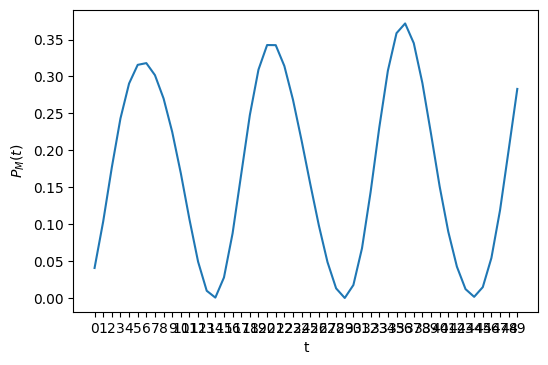

In [38]:
N = 200
d = N//2
p = 0.1
steps = 50
theta = [np.pi/d]*d
marked = [0]
U = sqw_bip_op(N, theta, d, p)
final,probs = searching_evolution(U, marked, N, steps, d)

plt.figure(dpi = 100)
plt.plot(probs)
plt.xticks(np.arange(steps))
plt.ylabel(r'$P_M(t)$')
plt.xlabel('t')
plt.show()